# Task 1: <font color="#338CFF">Bank Customer Churn Prediction</font>

---

## Contribution: <font color="#b30000">Rajesh Patil (Individual)</font>

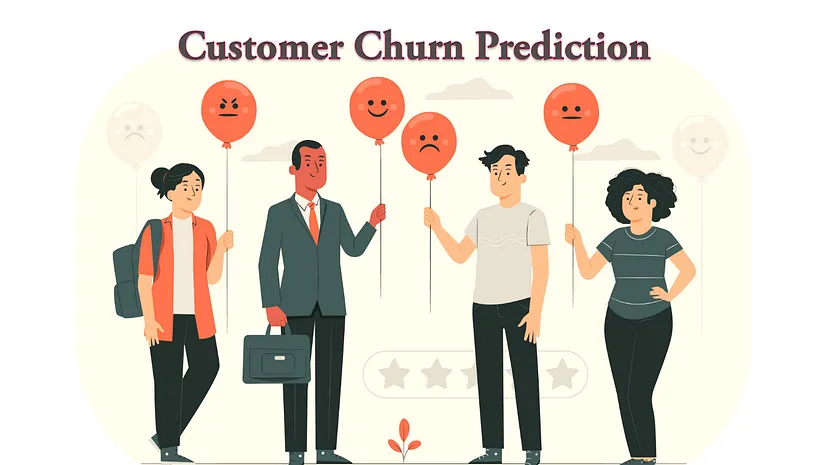

### <font color="#b30000">Step 1: Data Preprocessing and Exploration</font>

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [2]:
# Load the datasets
df = pd.read_csv("Churn_Modelling.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [4]:
# Check for missing values
missing_values = df.isnull().sum()
print("\033[1mMissing Values:\033[0m,\n", missing_values)

Missing Values:,
 RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64


In [5]:
# Check for duplicates
duplicates = df.duplicated().sum()
print("\033[1mDuplicate Rows:\033[0m", duplicates)

Duplicate Rows: 0


In [6]:
# Descriptive statistics
summary_stats = df.describe()
print("\033[1mSummary Statistics:\033[0m,\n", summary_stats)

Summary Statistics:,
          RowNumber    CustomerId   CreditScore           Age        Tenure  \
count  10000.00000  1.000000e+04  10000.000000  10000.000000  10000.000000   
mean    5000.50000  1.569094e+07    650.528800     38.921800      5.012800   
std     2886.89568  7.193619e+04     96.653299     10.487806      2.892174   
min        1.00000  1.556570e+07    350.000000     18.000000      0.000000   
25%     2500.75000  1.562853e+07    584.000000     32.000000      3.000000   
50%     5000.50000  1.569074e+07    652.000000     37.000000      5.000000   
75%     7500.25000  1.575323e+07    718.000000     44.000000      7.000000   
max    10000.00000  1.581569e+07    850.000000     92.000000     10.000000   

             Balance  NumOfProducts    HasCrCard  IsActiveMember  \
count   10000.000000   10000.000000  10000.00000    10000.000000   
mean    76485.889288       1.530200      0.70550        0.515100   
std     62397.405202       0.581654      0.45584        0.499797   
min

In [7]:
# Remove the "Surname" column from the dataset
df.drop(columns=['RowNumber', 'CustomerId','Surname'], inplace=True)

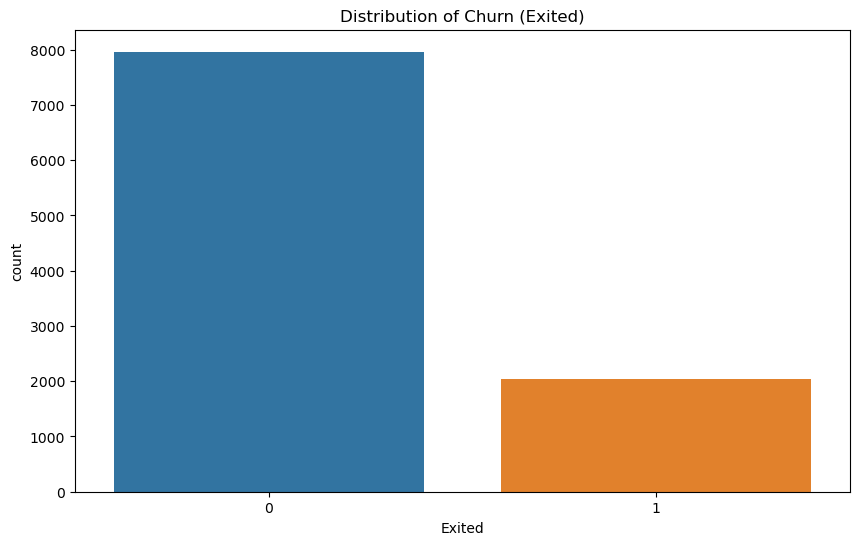

In [8]:
# Data Exploration: Visualization
plt.figure(figsize=(10, 6))

sns.countplot(x='Exited', data=df)
plt.title('Distribution of Churn (Exited)')
plt.show()

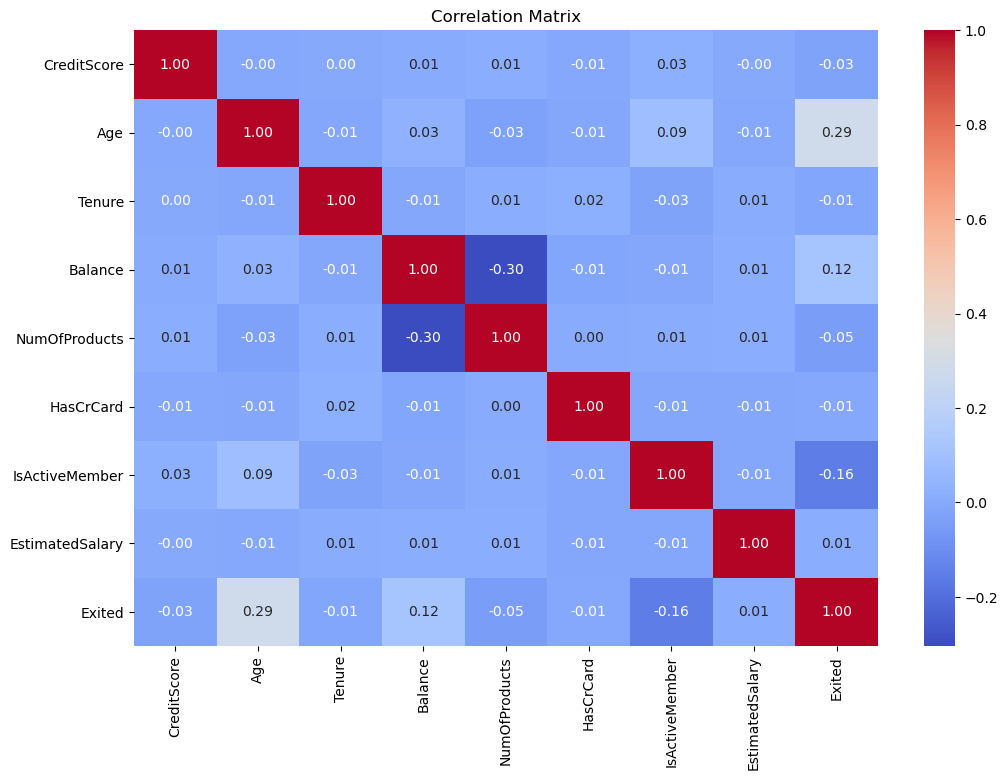

In [9]:
# Data Exploration: Correlation Matrix
correlation_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

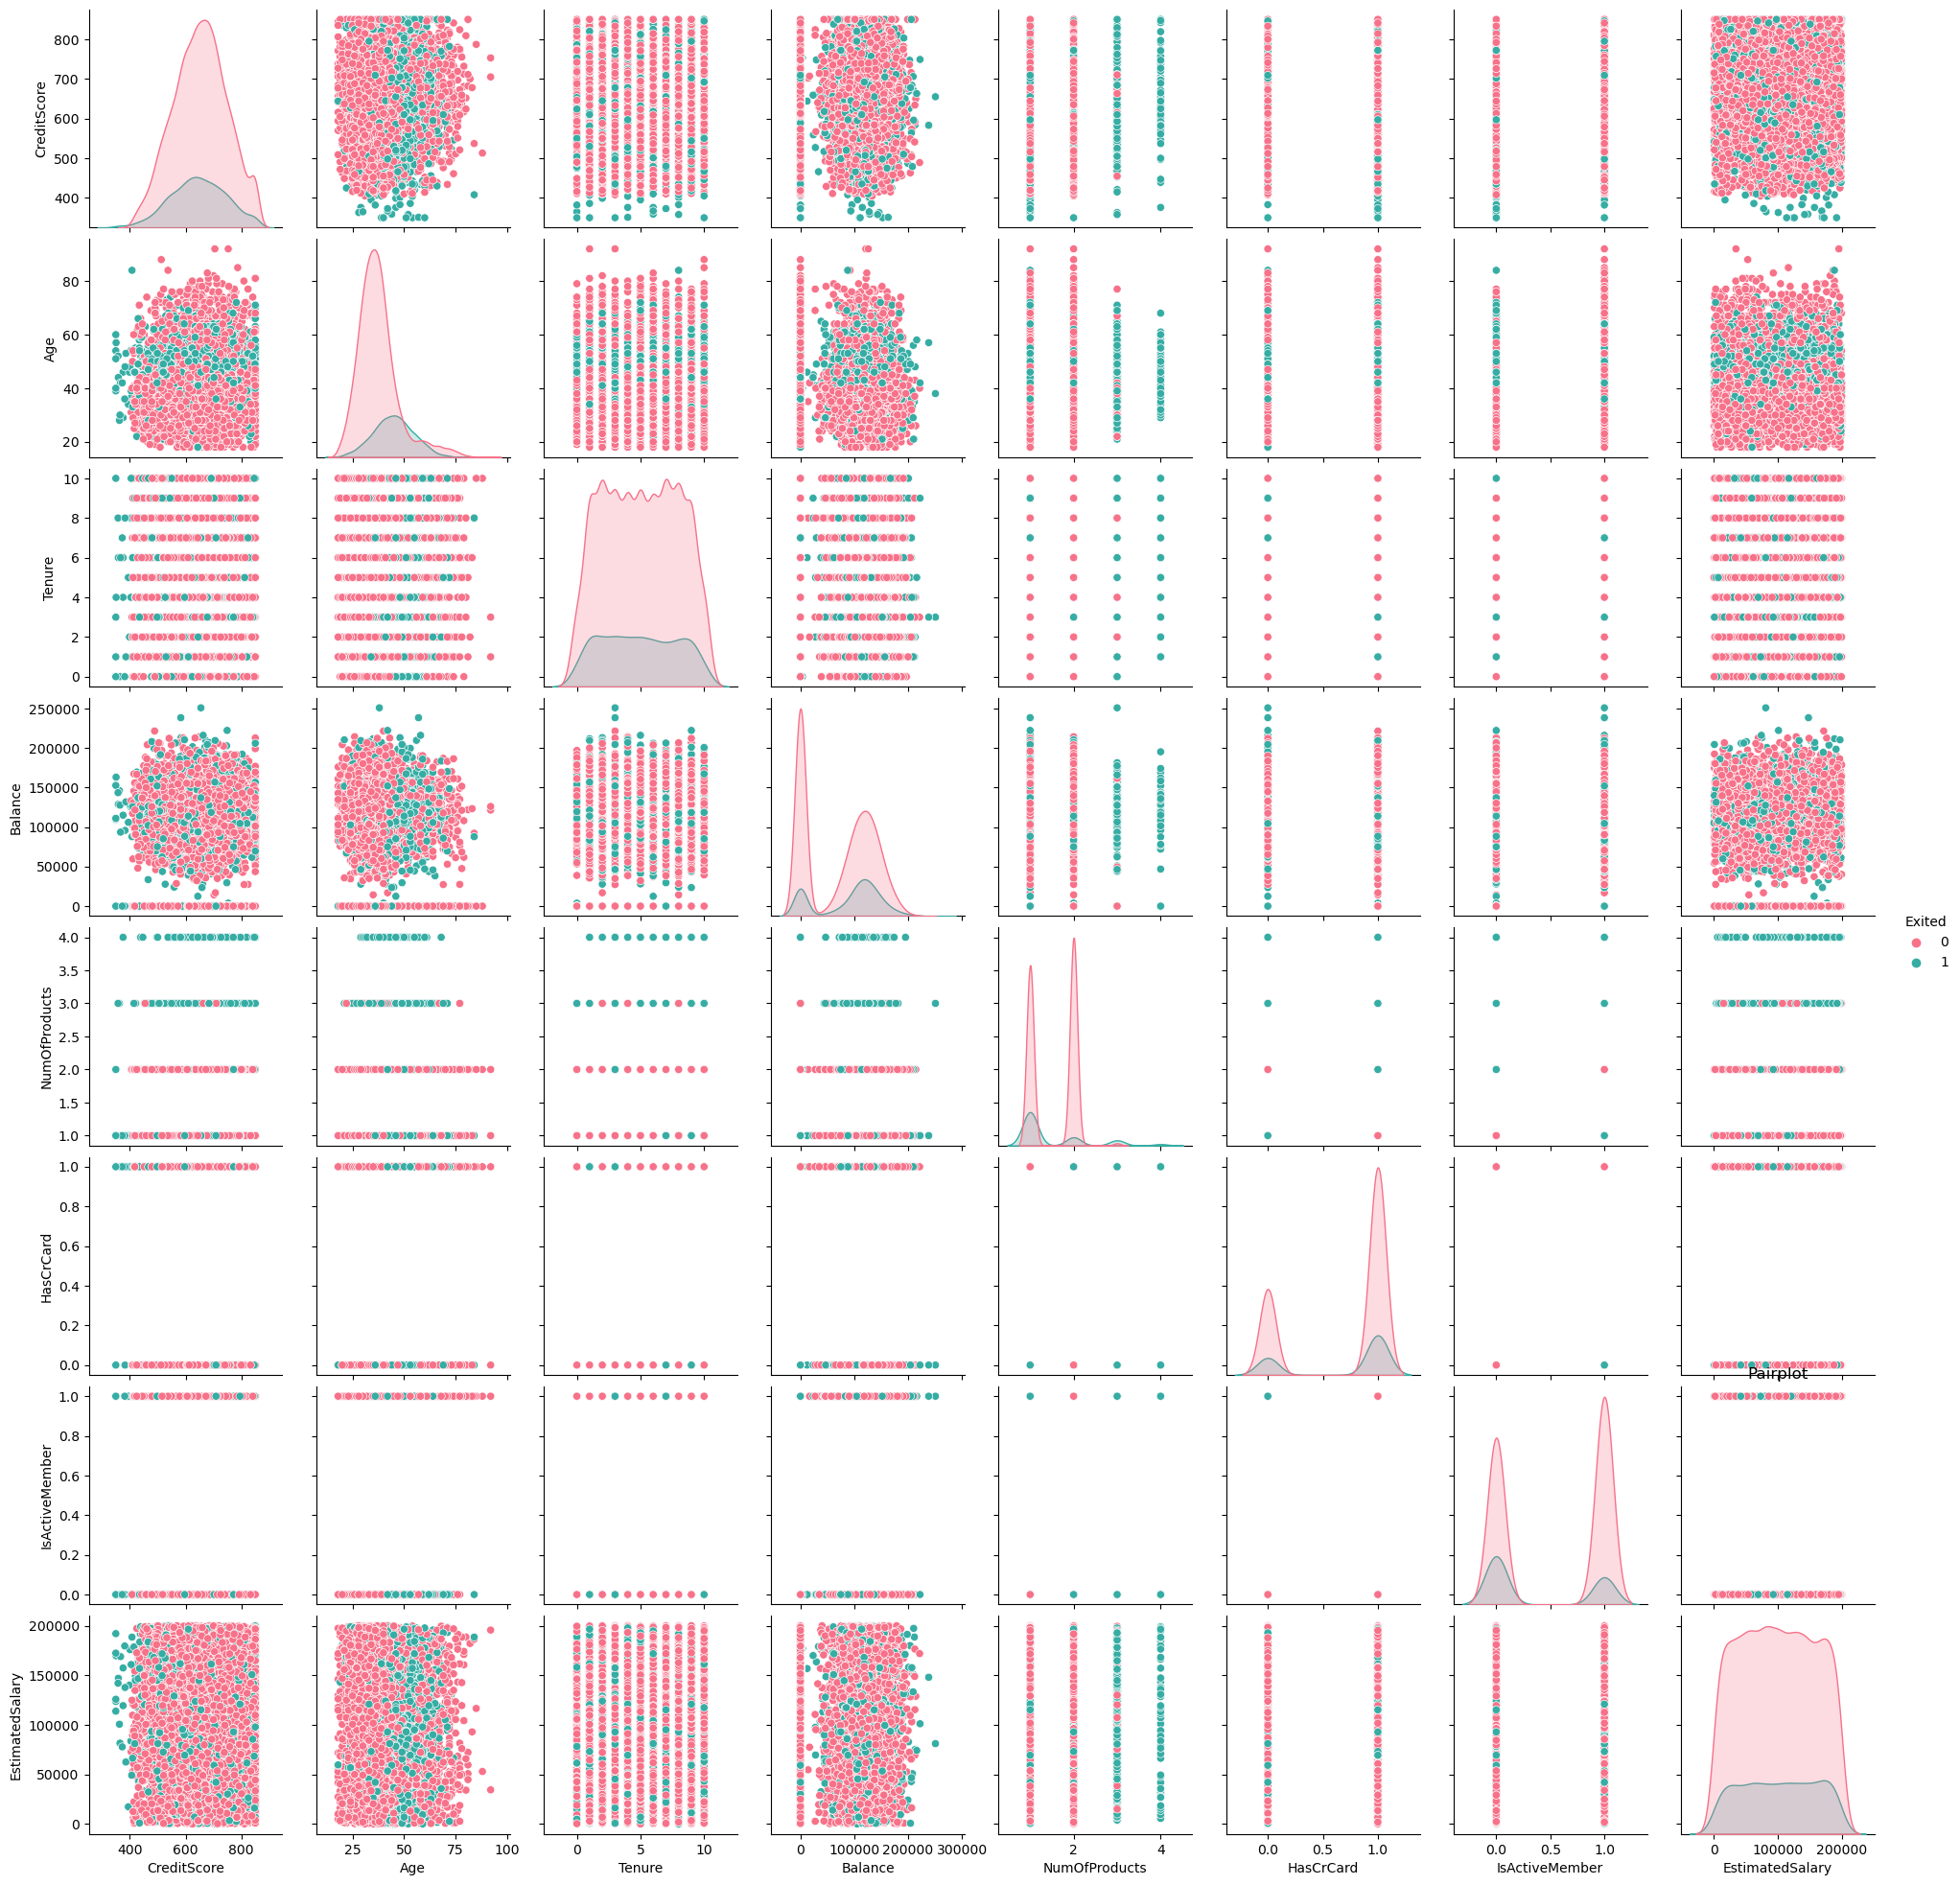

In [10]:
# Data Exploration: Pairplot
sns.pairplot(df, hue='Exited', palette='husl')
plt.title('Pairplot')
plt.show()

### <font color="#b30000">Step 2: Data Preprocessing</font>

In [11]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [12]:
# Separate features (X) and target variable (y)
X = df.drop(columns=['Exited'])  # Features (exclude the 'Exited' column)
y = df['Exited']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
# Define categorical and numerical feature columns
categorical_features = ['Geography', 'Gender']  # Add more if needed
numerical_features = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']

# Create transformers for encoding and scaling
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(drop='first'))  # 'drop' removes the first category to avoid multicollinearity
])

numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

# Combine transformers using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features),
        ('num', numerical_transformer, numerical_features)
    ])

### <font color="#b30000">Step 3: Model Selection, Training and Evaluation</font>

In [14]:
# Import necessary libraries for each algorithm
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

In [15]:
# Define a dictionary of classifiers
classifiers = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Neural Network': MLPClassifier(max_iter=500),  # You can adjust max_iter as needed
    'Support Vector Classifier': SVC(),
    'k-Nearest Neighbors': KNeighborsClassifier(),
    'XGBoost': XGBClassifier()
}

# Create a loop to train and evaluate each classifier
for name, clf in classifiers.items():
    print(f"\033[1mTraining and evaluating {name}\033[0m...")
    
    # Create a new pipeline with the classifier
    clf_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                    ('model', clf)])
    
    # Fit the model on the training data
    clf_pipeline.fit(X_train, y_train)
    
    # Make predictions on the testing data
    y_pred = clf_pipeline.predict(X_test)
    
    # Calculate evaluation metrics for each classifier
    # Calculate evaluation metrics (accuracy, precision, recall, F1-score, roc_auc_score)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)
    
    # Print evaluation metrics for each classifier
    print(f"{name} - \033[1mAccuracy: \033[0m{accuracy:.4f}")
    print(f"{name} - \033[1mPrecision: \033[0m{precision:.4f}")
    print(f"{name} - \033[1mRecall: \033[0m{recall:.4f}")
    print(f"{name} - \033[1mF1-Score: \033[0m{f1:.4f}")
    print(f"{name} - \033[1mROC AUC: \033[0m{roc_auc:.4f}")
    print("="*50)

Training and evaluating Logistic Regression...
Logistic Regression - Accuracy: 0.8110
Logistic Regression - Precision: 0.5524
Logistic Regression - Recall: 0.2010
Logistic Regression - F1-Score: 0.2948
Logistic Regression - ROC AUC: 0.5806
Training and evaluating Decision Tree...
Decision Tree - Accuracy: 0.7790
Decision Tree - Precision: 0.4437
Decision Tree - Recall: 0.4911
Decision Tree - F1-Score: 0.4662
Decision Tree - ROC AUC: 0.6703
Training and evaluating Random Forest...
Random Forest - Accuracy: 0.8665
Random Forest - Precision: 0.7500
Random Forest - Recall: 0.4809
Random Forest - F1-Score: 0.5860
Random Forest - ROC AUC: 0.7209
Training and evaluating Gradient Boosting...
Gradient Boosting - Accuracy: 0.8675
Gradient Boosting - Precision: 0.7500
Gradient Boosting - Recall: 0.4885
Gradient Boosting - F1-Score: 0.5917
Gradient Boosting - ROC AUC: 0.7244
Training and evaluating Neural Network...
Neural Network - Accuracy: 0.8615
Neural Network - Precision: 0.6921
Neural Networ

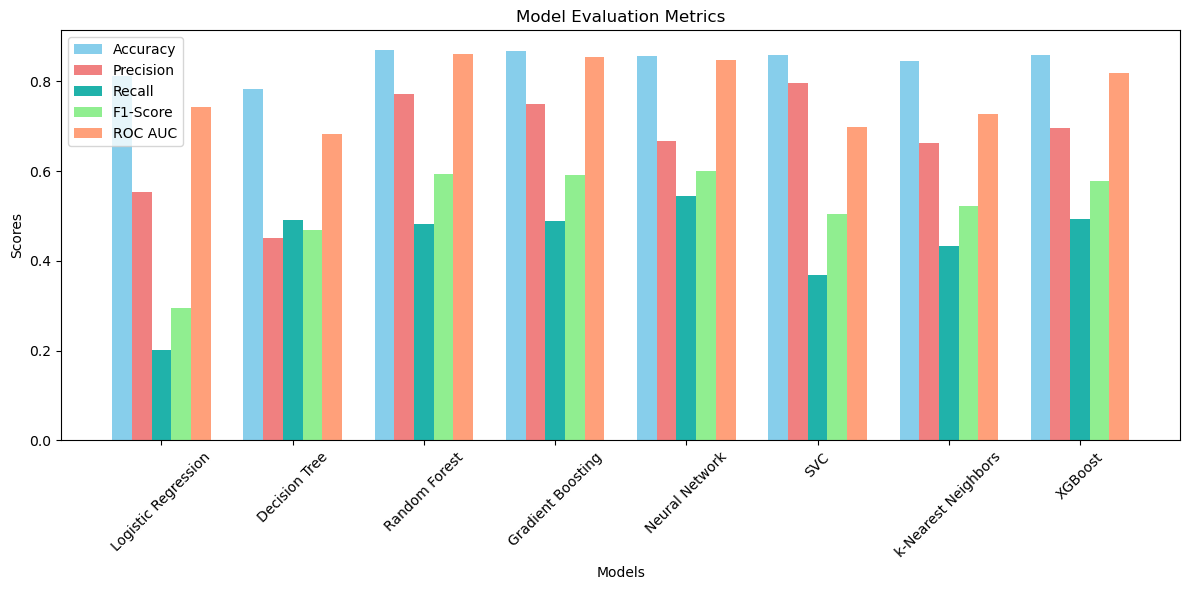

In [16]:
# List of model names
model_names = ["Logistic Regression", "Decision Tree", "Random Forest", "Gradient Boosting", "Neural Network", "SVC", "k-Nearest Neighbors", "XGBoost"]

# Evaluation metrics for each model
accuracy = [0.8110, 0.7820, 0.8700, 0.8675, 0.8570, 0.8575, 0.8450, 0.8580]
precision = [0.5524, 0.4499, 0.7714, 0.7500, 0.6667, 0.7967, 0.6615, 0.6953]
recall = [0.2010, 0.4911, 0.4809, 0.4885, 0.5445, 0.3690, 0.4326, 0.4936]
f1_score = [0.2948, 0.4696, 0.5925, 0.5917, 0.5994, 0.5043, 0.5231, 0.5774]
roc_auc = [0.7437, 0.6817, 0.8607, 0.8536, 0.8473, 0.6987, 0.7276, 0.8190]

# Create an index for the x-axis
index = np.arange(len(model_names))

# Set the width of the bars
bar_width = 0.15

# Create subplots for each metric
fig, ax = plt.subplots(figsize=(12, 6))

# Plot accuracy
plt.bar(index, accuracy, bar_width, label='Accuracy', color='skyblue')
# Plot precision
plt.bar(index + bar_width, precision, bar_width, label='Precision', color='lightcoral')
# Plot recall
plt.bar(index + 2 * bar_width, recall, bar_width, label='Recall', color='lightseagreen')
# Plot F1-score
plt.bar(index + 3 * bar_width, f1_score, bar_width, label='F1-Score', color='lightgreen')
# Plot ROC AUC
plt.bar(index + 4 * bar_width, roc_auc, bar_width, label='ROC AUC', color='lightsalmon')

# Set the labels, title, and legend
plt.xlabel('Models')
plt.ylabel('Scores')
plt.title('Model Evaluation Metrics')
plt.xticks(index + 2 * bar_width, model_names, rotation=45)
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

### <font color="#b30000">Step 4: Hyperparameter Tuning for Gradient Boosting</font>

In [17]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameter grid for Gradient Boosting
param_grid = {
    'model__n_estimators': [100, 200, 300],
    'model__learning_rate': [0.01, 0.1, 0.2],
    'model__max_depth': [3, 4, 5],
    # Add more hyperparameters to tune as needed
}

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=clf_pipeline, param_grid=param_grid, cv=5, scoring='f1', n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best parameters and best estimator
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

# Print the best parameters
print("\033[1mAccuracy:Best Parameters:\033[0mAccuracy:", best_params)

Best Parameters: {'model__learning_rate': 0.1, 'model__max_depth': 5, 'model__n_estimators': 100}


### <font color="#b30000">Step 5: Evaluate the Tuned Gradient Boosting Model</font>

In [19]:
# Evaluate the tuned Gradient Boosting model on the test data
y_pred_tuned = best_estimator.predict(X_test)

# Calculate evaluation metrics (accuracy, precision, recall, F1-score, ROC AUC) for the tuned model
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

accuracy_tuned = accuracy_score(y_test, y_pred_tuned)
precision_tuned = precision_score(y_test, y_pred_tuned)
recall_tuned = recall_score(y_test, y_pred_tuned)
f1_tuned = f1_score(y_test, y_pred_tuned)
roc_auc_tuned = roc_auc_score(y_test, y_pred_tuned)

# Print evaluation metrics for the tuned model
print("\033[1mTuned Gradient Boosting Model Evaluation:\033[0m")
print(f"Accuracy: {accuracy_tuned:.4f}")
print(f"Precision: {precision_tuned:.4f}")
print(f"Recall: {recall_tuned:.4f}")
print(f"F1-Score: {f1_tuned:.4f}")
print(f"ROC AUC: {roc_auc_tuned:.4f}")

Tuned Gradient Boosting Model Evaluation:
Accuracy: 0.8645
Precision: 0.7328
Recall: 0.4885
F1-Score: 0.5863
ROC AUC: 0.7225


### <font color="#b30000">Step 6: Interpretability and Insights</font>

In [26]:
# Retrieve the best estimator
best_estimator = grid_search.best_estimator_

# Initialize an empty list to store feature importances
importances = []

# Loop through the columns and retrieve importances
for col in X.columns:
    if col in categorical_features:
        # For categorical features, we need to sum the importances of all encoded columns
        col_importance = sum([best_estimator.named_steps['model'].feature_importances_[X.columns.get_loc(col)] for col in X.columns if col.startswith(col)])
    else:
        # For numerical features, we can directly retrieve the importance
        col_importance = best_estimator.named_steps['model'].feature_importances_[X.columns.get_loc(col)]
    
    importances.append(col_importance)

# Create a DataFrame to display feature importance scores
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display the top N important features (adjust N as needed)
top_n = 10
print("\033[1mTop", top_n, "Important Features:\033[0m")
print(feature_importance_df.head(top_n))

Top 10 Important Features:
           Feature  Importance
1        Geography    0.971541
2           Gender    0.971541
7        HasCrCard    0.235760
9  EstimatedSalary    0.230822
4           Tenure    0.182964
0      CreditScore    0.098299
6    NumOfProducts    0.056535
3              Age    0.029956
5          Balance    0.027970
8   IsActiveMember    0.024019


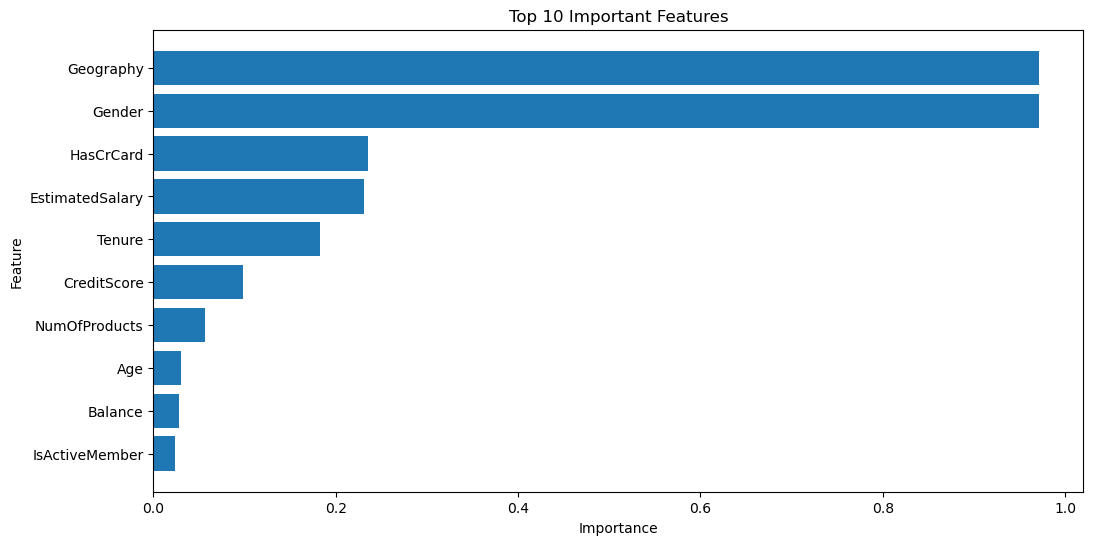

In [27]:
# Sort the feature importances in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Create a bar plot to visualize the feature importances
plt.figure(figsize=(12, 6))
plt.barh(feature_importance_df['Feature'][:top_n], feature_importance_df['Importance'][:top_n])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Top {} Important Features'.format(top_n))
plt.gca().invert_yaxis()  # Invert the y-axis to display the most important feature at the top
plt.show()

### <font color="#b30000">Step 7: Train the Final Model & Make Predictions</font>

In [29]:
# Create transformers for encoding and scaling
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(drop='first'))  # 'drop' removes the first category to avoid multicollinearity
])

numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

# Combine transformers using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features),
        ('num', numerical_transformer, numerical_features)
    ])

# Apply the preprocessing steps to your training and testing data
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)

In [30]:
from sklearn.ensemble import GradientBoostingClassifier

# Create a Gradient Boosting classifier with the best hyperparameters
final_gb_model = GradientBoostingClassifier(learning_rate=0.1, max_depth=5, n_estimators=100)

# Fit the model on the preprocessed training data
final_gb_model.fit(X_train_preprocessed, y_train)

GradientBoostingClassifier(max_depth=5)

In [31]:
# Make predictions on the test dataset
y_pred = final_gb_model.predict(X_test_preprocessed)

### <font color="#b30000">Step 8: Evaluate the Model</font>

In [33]:
# Calculate various evaluation metrics using the predicted labels (y_pred) and the true labels (y_test)
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

# Print or display these evaluation metrics to assess the model's performance
print(f"\033[1mAccuracy: \033[0m{accuracy:.4f}")
print(f"\033[1mPrecision: \033[0m{precision:.4f}")
print(f"\033[1mRecall: \033[0m{recall:.4f}")
print(f"\033[1mF1-Score: \033[0m{f1:.4f}")
print(f"\033[1mROC AUC: \033[0m{roc_auc:.4f}")

Accuracy: 0.8680
Precision: 0.7398
Recall: 0.5064
F1-Score: 0.6012
ROC AUC: 0.7314


### <font color="#b30000">Step 9: Model Saving</font>

In [34]:
import pickle

# Save the final Gradient Boosting classifier model to a pickle file
with open('final_gb_model.pkl', 'wb') as model_file:
    pickle.dump(final_gb_model, model_file)

## <font color="#338CFF">Thank You..</font>